In [ ]:
#@title IRIS DATASET K-MEANS

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

df = df.drop(columns=['target'])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

print(df.head())
print("Cluster Centers:\n", kmeans.cluster_centers_)


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   cluster  
0        1  
1        2  
2        2  
3        2  
4   

#**LAB TASKS**

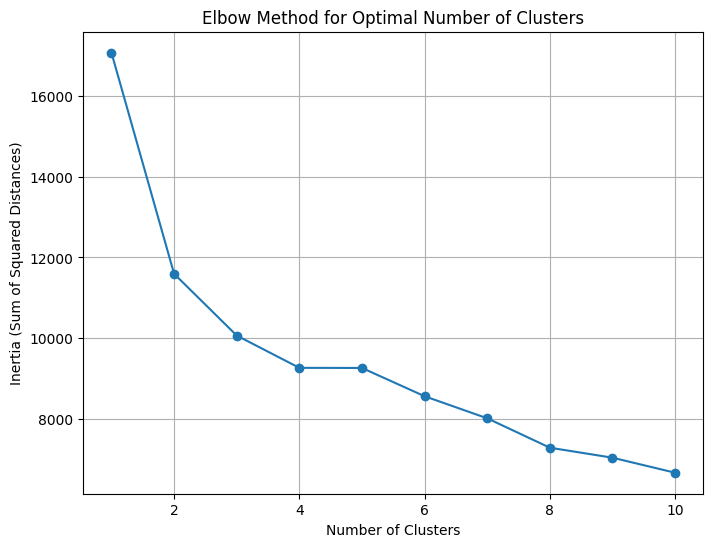

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [ ]:
#@title TASK 1:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

inertia = []
range_clusters = range(1, 11)

for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()

optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

print(df.head())


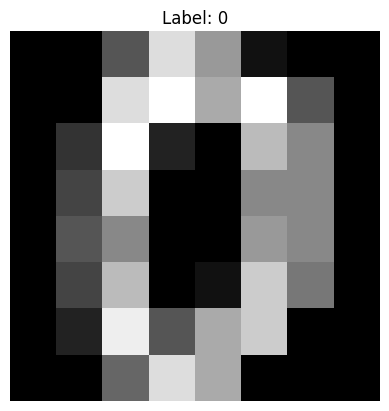

Explained variance by 2 components: [0.12033916 0.09561054]
Total explained variance: 0.21594970500832805


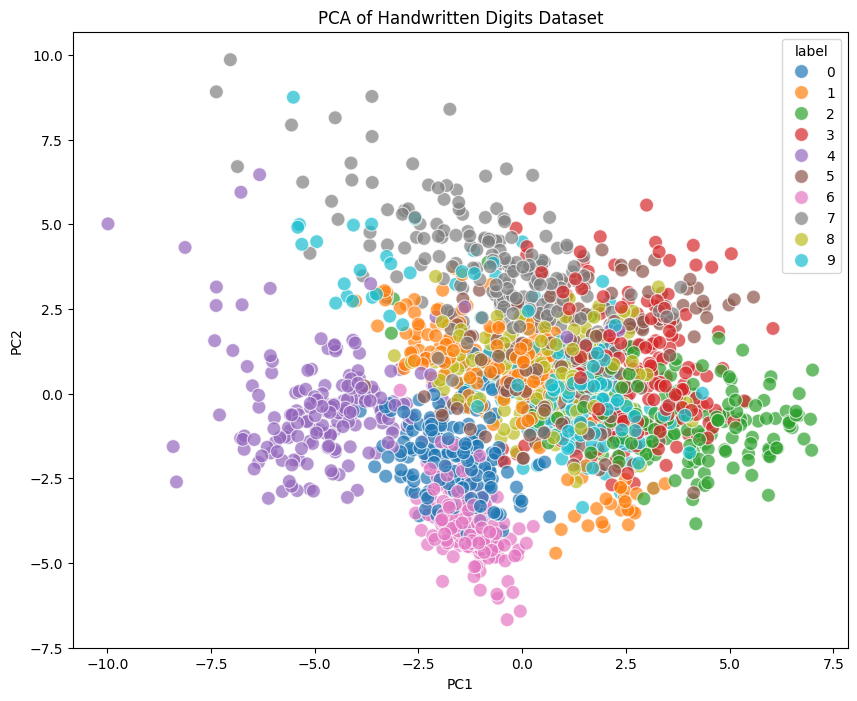

In [ ]:
#@title TASK 2:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
import seaborn as sns

digits = load_digits()
df_digits = pd.DataFrame(digits.data)
df_digits['number_label'] = digits.target

# Step 1: Create a new DataFrame 'pixels' containing only the pixel feature values
pixels = df_digits.drop(columns='number_label')

# Step 2: Grab a single image row (first row in the pixels DataFrame)
single_image = pixels.iloc[0]

# Step 3: Convert the single image row to a numpy array
single_image_array = np.array(single_image)

# Step 4: Reshape the array to (8,8) for image representation
single_image_reshaped = single_image_array.reshape(8, 8)

# Step 5: Use Matplotlib to display the image
plt.imshow(single_image_reshaped, cmap='gray')
plt.title(f"Label: {digits.target[0]}")
plt.axis('off')
plt.show()

# Step 6: Scale the pixel feature dataframe
scaler = StandardScaler()
pixels_scaled = scaler.fit_transform(pixels)

# Step 7: Apply PCA on the scaled pixel data (2 components)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(pixels_scaled)

# Step 8: Show the explained variance by the 2 principal components
print(f"Explained variance by 2 components: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_)}")

# Step 9: Create a scatterplot of the digits in the 2D PCA space
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['label'] = digits.target

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='label', palette='tab10', data=pca_df, s=100, marker='o', alpha=0.7)
plt.title("PCA of Handwritten Digits Dataset")
plt.show()
